In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


df = pd.read_csv("Exoplanet_With_Labels.csv")


In [28]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Patch SimpleImputer to return DataFrame with original column names
_original_fit_transform = SimpleImputer.fit_transform

def _patched_fit_transform(self, X, y=None):
    result = _original_fit_transform(self, X, y)
    if isinstance(X, pd.DataFrame):
        return pd.DataFrame(result, columns=X.columns, index=X.index)
    return result

SimpleImputer.fit_transform = _patched_fit_transform


<Figure size 1000x600 with 0 Axes>

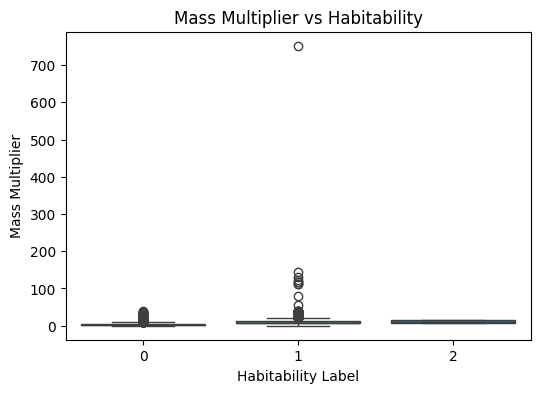

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='habitability_cluster', y='mass_multiplier', data=df)
plt.title('Mass Multiplier vs Habitability')
plt.xlabel('Habitability Label')
plt.ylabel('Mass Multiplier')

plt.show()


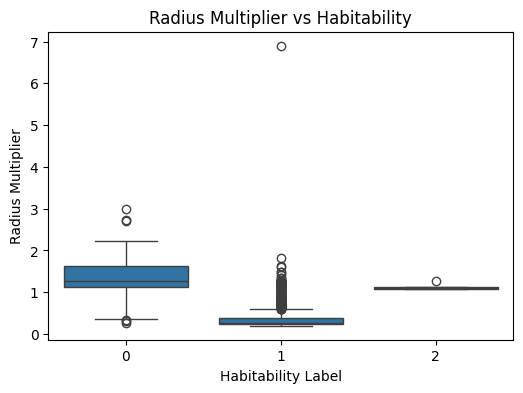

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x='habitability_cluster', y='radius_multiplier', data=df)
plt.title('Radius Multiplier vs Habitability')
plt.xlabel('Habitability Label')
plt.ylabel('Radius Multiplier')
plt.show()


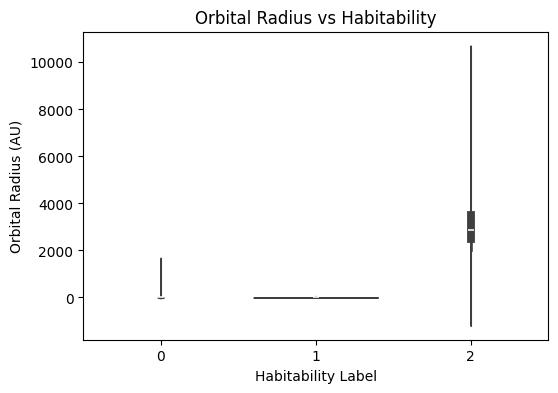

In [31]:
plt.figure(figsize=(6,4))
sns.violinplot(x='habitability_cluster', y='orbital_radius', data=df)
plt.title('Orbital Radius vs Habitability')
plt.xlabel('Habitability Label')
plt.ylabel('Orbital Radius (AU)')
plt.show()


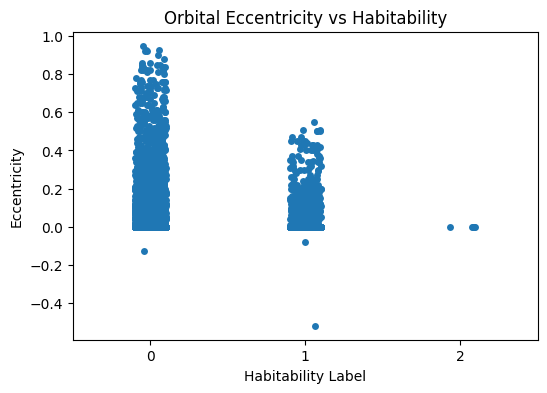

In [32]:
plt.figure(figsize=(6,4))
sns.stripplot(x='habitability_cluster', y='eccentricity', data=df, jitter=True)
plt.title('Orbital Eccentricity vs Habitability')
plt.xlabel('Habitability Label')
plt.ylabel('Eccentricity')
plt.show()


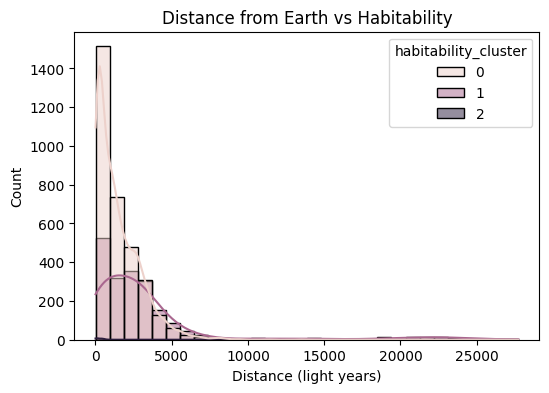

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='distance', hue='habitability_cluster', bins=30, kde=True)
plt.title('Distance from Earth vs Habitability')
plt.xlabel('Distance (light years)')
plt.ylabel('Count')
plt.show()


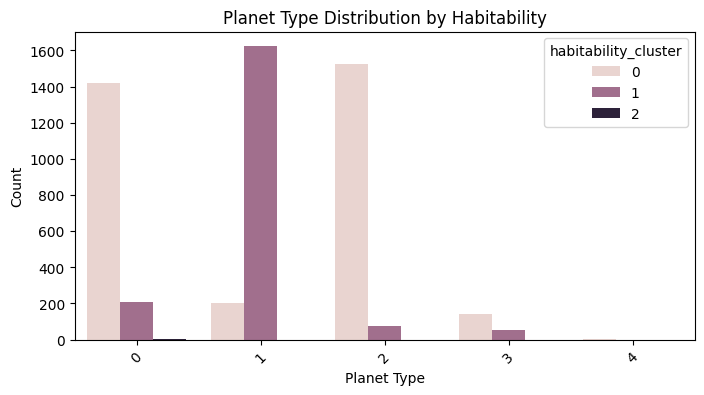

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(x='planet_type', hue='habitability_cluster', data=df)
plt.title('Planet Type Distribution by Habitability')
plt.xlabel('Planet Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


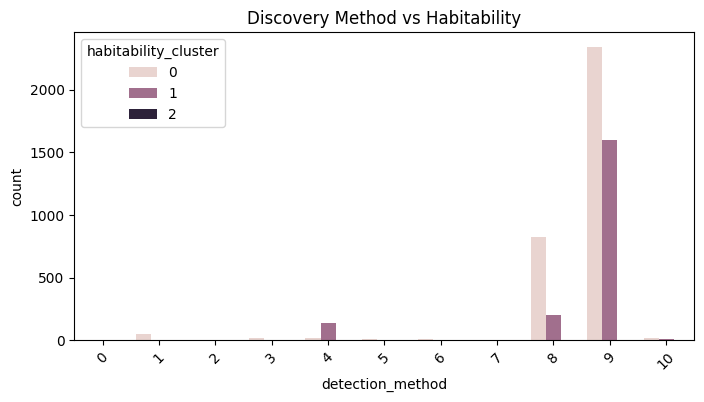

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(x='detection_method', hue='habitability_cluster', data=df)
plt.title('Discovery Method vs Habitability')
plt.xticks(rotation=45)
plt.show()


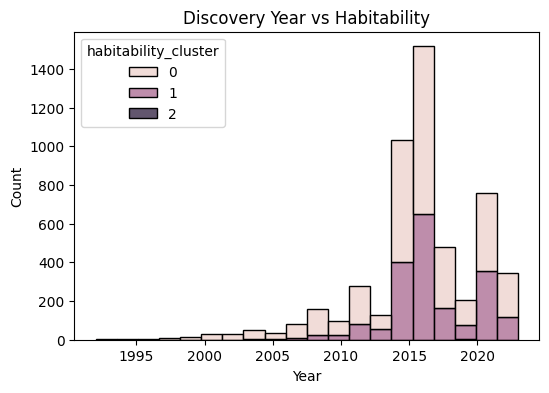

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='discovery_year', hue='habitability_cluster', multiple="stack", bins=20)
plt.title('Discovery Year vs Habitability')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


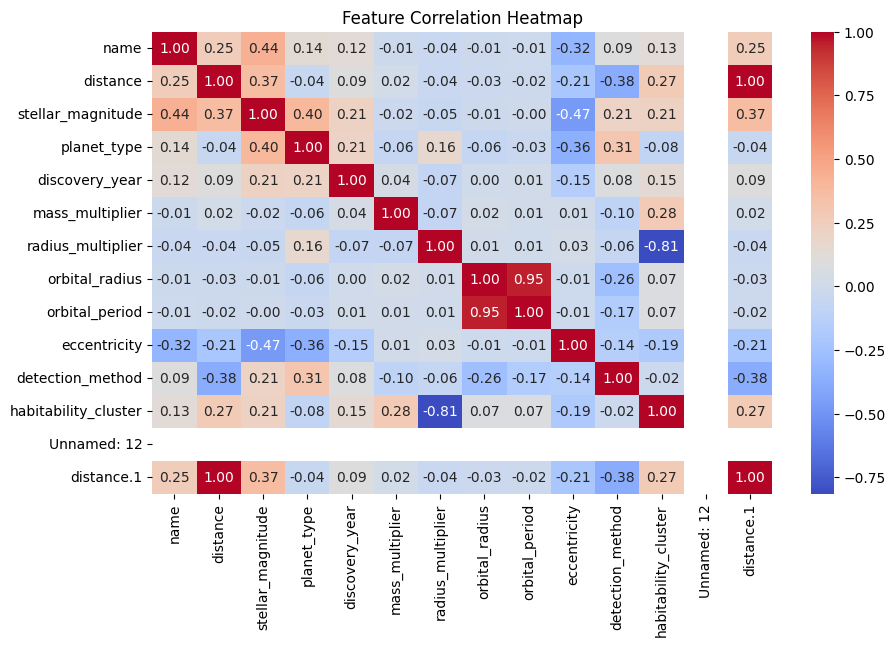

In [37]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Fix NaN issue (without changing rest of your pipeline)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)




ValueError: Shape of passed values is (5250, 12), indices imply (5250, 13)

In [45]:

# Assuming 'habitability_cluster' is the target
X = df.drop(columns=['habitability_cluster'])
y = df['habitability_cluster']

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Fix NaN issue (without changing rest of your pipeline)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
model = RandomForestClassifier()
model.fit(X, y)

ValueError: Shape of passed values is (5250, 12), indices imply (5250, 13)

In [47]:
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

ValueError: Length of values (12) does not match length of index (13)

In [48]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

NameError: name 'feat_importances' is not defined

In [49]:
top_features = feat_importances.head(4).index.tolist() + ['habitability_cluster']
sns.pairplot(df[top_features], hue='habitability_cluster')
plt.suptitle("Pairwise Relationship of Top Features", y=1.02)
plt.show()


NameError: name 'feat_importances' is not defined